<a href="https://colab.research.google.com/github/ManasPatil281/AI_Learning_Assistant/blob/master/Finplex_Solution_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mamun1113_doctors_handwritten_prescription_bd_dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/641.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/173.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/491.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/718.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/709.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/379.png
/kaggle/input/doctors-handwrit

In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
image_folder = '/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words'
label_file = '/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv'

In [ ]:
labels_df = pd.read_csv(label_file)
labels_df.columns

Index(['IMAGE', 'MEDICINE_NAME', 'GENERIC_NAME'], dtype='object')

In [ ]:
images = []
labels = []

filename_col = 'IMAGE'
label_col = 'MEDICINE_NAME'

In [ ]:
labels_df.head()

,IMAGE,MEDICINE_NAME,GENERIC_NAME
0,0.png,Aceta,Paracetamol
1,1.png,Aceta,Paracetamol
2,2.png,Aceta,Paracetamol
3,3.png,Aceta,Paracetamol
4,4.png,Aceta,Paracetamol


In [ ]:
for index, row in labels_df.iterrows():
    img_path = os.path.join(image_folder, row[filename_col])
    img = load_img(img_path, target_size=(64, 64))  # Resize to a fixed size
    img = img_to_array(img)
    images.append(img)
    labels.append(row[label_col])

In [ ]:
images = np.array(images, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded, num_classes=78)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(78, activation='softmax'))


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
history_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9782 - loss: 0.0814 - val_accuracy: 0.7660 - val_loss: 1.4578
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9691 - loss: 0.0916 - val_accuracy: 0.7628 - val_loss: 1.3304
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9796 - loss: 0.0641 - val_accuracy: 0.7516 - val_loss: 1.2902
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9835 - loss: 0.0574 - val_accuracy: 0.7516 - val_loss: 1.3418
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9663 - loss: 0.0953 - val_accuracy: 0.7452 - val_loss: 1.4896
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0731 - val_accuracy: 0.7692 - val_loss: 1.2534
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9859 - loss: 0.0475 - val_accuracy: 0.7276 - val_loss: 1.5527
Epoch 8/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.7452 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 1.5863
Test Accuracy: 75.48%


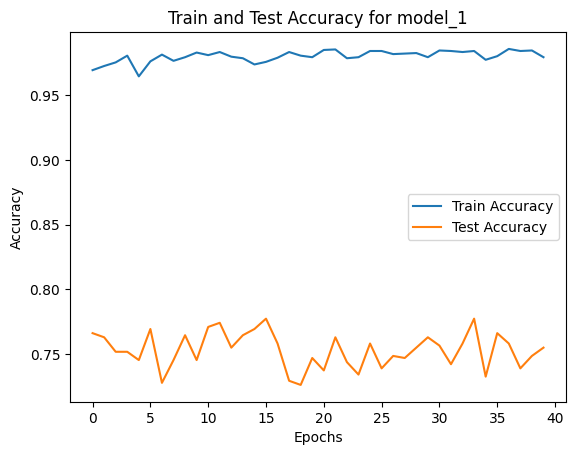

In [ ]:
import matplotlib.pyplot as plt


history_data = history_1.history


plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for model_1')
plt.legend()
plt.show()


In [ ]:
model.save('Test_Model_1.keras')

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.8))

model_2.add(Dense(78, activation='softmax'))


model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9347 - loss: 0.2079 - val_accuracy: 0.7660 - val_loss: 1.1025
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9413 - loss: 0.2076 - val_accuracy: 0.7708 - val_loss: 1.1658
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.2021 - val_accuracy: 0.7644 - val_loss: 1.2059
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9353 - loss: 0.2202 - val_accuracy: 0.7532 - val_loss: 1.1329
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.2070 - val_accuracy: 0.7756 - val_loss: 1.0700
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9409 - loss: 0.1946 - val_accuracy: 0.7644 - val_loss: 1.1364
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9240 - loss: 0.2319 - val_accuracy: 0.7756 - val_loss: 1.0613
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9154 - loss: 0.2459 - val_accuracy: 0.7837 - val_loss:

In [ ]:
loss, accuracy = model_2.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 1.0775
Test Accuracy: 76.12%


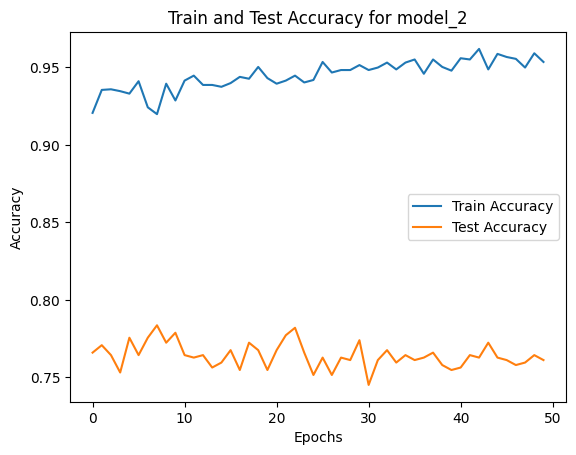

In [ ]:
import matplotlib.pyplot as plt


history_data = history_2.history


plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for model_2')
plt.legend()
plt.show()

In [ ]:
model.save('Test_Model_2.keras')

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.8))

model_3.add(Dense(78, activation='softmax'))


model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0073 - loss: 4.3767 - val_accuracy: 0.0112 - val_loss: 4.3579
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0190 - loss: 4.3573 - val_accuracy: 0.0128 - val_loss: 4.3597
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0141 - loss: 4.3570 - val_accuracy: 0.0032 - val_loss: 4.3602
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0167 - loss: 4.3562 - val_accuracy: 0.0080 - val_loss: 4.3563
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0178 - loss: 4.3568 - val_accuracy: 0.0064 - val_loss: 4.3454
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0176 - loss: 4.3344 - val_accuracy: 0.0272 - val_loss: 4.3309
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0198 - loss: 4.3071 - val_accuracy: 0.0449 - val_loss: 4.2530
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0260 - loss: 4.2661 - val_accuracy: 0.0801 - val_loss

In [ ]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 1.1456 
Test Accuracy: 71.63%


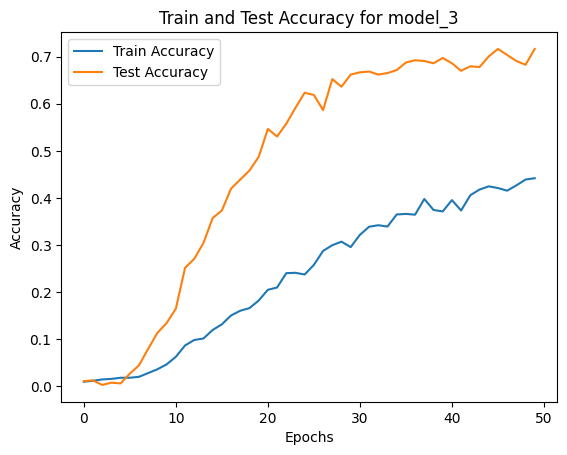

In [ ]:
import matplotlib.pyplot as plt


history_data = history_3.history


plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for model_3')
plt.legend()
plt.show()